In [ ]:
!wget -q https://data.mendeley.com/public-files/datasets/j78w4s258j/files/b387e359-15f6-4cfc-847a-ba82167e6f65/file_downloaded -O 'Vaccine Hesitancy.csv'

import pandas as pd
import numpy as np
import pickle

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
#import dataset
data = pd.read_csv('Vaccine Hesitancy.csv', encoding='cp1252')


EDA

In [ ]:
data.shape  # number of rows & columns


(413, 41)

In [ ]:
data.info()  # see columns in dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 41 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype 
---  ------                                                                                                                                         --------------  ----- 
 0   County                                                                                                                                         413 non-null    object
 1   District                                                                                                                                       413 non-null    object
 2   Sex                                                                                                                                            413 non-null    object
 3   Age                                

In [ ]:
data  # look at few data entries


,County,District,Sex,Age,Religion,Education,Years,Households,Have you had MoH approved training on COVID-19?,Have you been involved in educating the community on COVID-19?,...,AIQ5: Attitude on Individual and Group Influences,AIQ6: Attitude on Individual and Group Influences,AVSQ1: Attitude on Vaccine safety and vaccination specific issues,AVSQ2: Attitudeon Vaccine safety and vaccination specific issues,AVSQ3: Attitude on Vaccine safety and vaccination specific issues,AVSQ4: Attitude on Vaccine safety and vaccination specific issues,AVSQ5: Attitude on Vaccine safety and vaccination specific issues,AVSQ6: Attitude on Vaccine safety and vaccination specific issues,Source,Information
0,Nairobi,Embakasi West,Female,Above 35 years,Catholic,Primary,Above 5 years,More than 50,Yes,No,...,No,Yes,Yes,No,Don't know,Don't know,The government might not be able to ensure eno...,Somewhat,Radio/TV,Internet
1,Nairobi,Westlands,Female,Above 35 years,Protestant,Primary,Less than 3 years,21-50,Yes,Yes,...,Yes,Yes,No,Yes,Very confident,Not at all,"1,8",Not at all,Radio/TV,Fellow health workers
2,Nairobi,Westlands,Female,Above 35 years,Others,Primary,Above 5 years,More than 50,Yes,Yes,...,Yes,Yes,No,No,Confident,Not too much,"1,4,5",Not too much,Radio/TV,Fellow health workers
3,Nairobi,Langata,Male,Above 35 years,Islam,Others,Above 5 years,More than 50,Yes,Yes,...,Yes,Yes,No,Yes,Very confident,Not too much,Vaccines are not tested enough for safety,Not too much,Radio/TV,Fellow health workers
4,Nairobi,Langata,Female,25-35 years,Catholic,Primary,Above 5 years,More than 50,Yes,Yes,...,Yes,Yes,No,Yes,Very confident,Somewhat,The COVID-19 vaccine might weaken the immunity...,Very much,Radio/TV,Fellow health workers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,Trans Nzoia,Sabaoti,Male,Above 35 years,Protestant,Secondary,Above 5 years,More than 50,Yes,Yes,...,Yes,Yes,Yes,Yes,Confident,Somewhat,"1,2",Somewhat,Social media/Radio/TV,Fellow health workers
409,Trans Nzoia,Kwanza,Female,Above 35 years,Protestant,Secondary,Above 5 years,21-50,Yes,Yes,...,Yes,Yes,Yes,Yes,Somehow confident,Somewhat,I don’t have any concerns about the COVID-19 v...,Very much,Radio/TV,Fellow health workers
410,Trans Nzoia,Kwanza,Female,Above 35 years,Protestant,Secondary,Above 5 years,More than 50,Yes,Yes,...,Yes,Yes,Yes,Yes,Confident,Not at all,I don’t have any concerns about the COVID-19 v...,Very much,Radio/TV/IEC/Community meeting,Fellow health workers
411,Trans Nzoia,Kwanza,Female,Above 35 years,Protestant,Secondary,Above 5 years,21-50,Yes,Yes,...,Yes,Yes,Yes,Yes,Somehow confident,Not at all,I don’t have any concerns about the COVID-19 v...,Very much,Radio/TV,Fellow health workers


In [ ]:
for col in data[data.columns]:
    a = data[col].value_counts()
    print('--------------------------------------')
    print(col)
    print('--------------------------------------')
    print(a)
    print('--------------------------------------\n')


--------------------------------------
County
--------------------------------------
Nairobi        209
Mombasa         84
Trans Nzoia     66
Kajiado         54
Name: County, dtype: int64
--------------------------------------

--------------------------------------
District
--------------------------------------
Westlands          55
Embakasi West      52
Langata            51
Kasarani           51
Kwanza             34
Sabaoti            32
Changamwe          28
Nyali              28
Kisauni            28
Kajiado Central    27
Kajiado East       27
Name: District, dtype: int64
--------------------------------------

--------------------------------------
Sex
--------------------------------------
Female    301
Male      108
Other       4
Name: Sex, dtype: int64
--------------------------------------

--------------------------------------
Age
--------------------------------------
Above 35 years    266
25-35 years       116
18-24 years        31
Name: Age, dtype: int64
--------------

In [ ]:
columns = data[data.columns]

for col in columns:
    unique = data[col].unique()
    # print(col[:5],':',len(unique),unique) #print all unique values

    # print for those with too many unique values
    if len(unique) > 11:
        print(col[:5], ':', len(unique), 'values', '->', unique, '\n')


ACQ1: : 27 values -> ['Radio/TV' 'IEC materials from MoH' '1,2' 'Community meetings'
 'Social media' 'Other (Explain)' '1,2,3,4' '2 ,5' '2,4' '2,5' '1,2,4'
 '2,1' '1,4' '1,5' '2,3,4' '2,4,5' '2 ,4' '2,3' '1 ,2' '1,2,3' 'N/1'
 '1TTITU45 3ONT5XU1L' '4,5' '1,3' '1.3' '3,4' '1,2,4,5'] 

ACQ2: : 16 values -> ['Internet' 'Fellow health workers' '4 he1lth worker from the motoury'
 'Friends/relatives' '1,3' 'Other (Explain)'
 '4 he1lth f13ulty he1lth 31re worker1' '4 N/1' '3,4' '2,3' 'N/1' '3HEW'
 'my 3HEW or He1lth f13ility (ne1rer)' '1,2,3' 'N1' '1,2'] 

AVSQ5 : 36 values -> ['The government might not be able to ensure enough supply of the vaccine and therefore result in a more negative effect'
 '1,8' '1,4,5' 'Vaccines are not tested enough for safety'
 'The COVID-19 vaccine might weaken the immunity of the people'
 'Vaccine is only given to people who are seriously infected with the virus'
 'I don’t have any concerns about the COVID-19 vaccine'
 'People cannot be vaccinated for a disease th

In [ ]:
# Columns ACQ1, ACQ2 & AVSQ5 have messy values, and based on the document,
# Source, Information, ACQ1 & ACQ2 don't hold useful data, and info in AVSQ5 is also represented in AVSQ6.
# so deleting these columns to make preprocessing easier

new_data = data.drop(labels=[
    'ACQ1: Attitude on Contextual Influences',
    'ACQ2: Attitude on Contextual Influences',
    'AVSQ5: Attitude on Vaccine safety and vaccination specific issues',
    'Source',
    'Information'
], axis=1)

# new_data.columns.to_list()


Encoding Data

In [ ]:
# copied from https://stackoverflow.com/a/58239419
class MultiColumnLabelEncoder:

    def __init__(self, columns=None):
        self.columns = columns  # array of column names to encode

    def fit(self, X, y=None):
        self.encoders = {}
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            self.encoders[col] = LabelEncoder().fit(X[col])
        return self

    def transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].transform(X[col])
        return output

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

    def inverse_transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].inverse_transform(X[col])
        return output


In [ ]:
multi_encoder = MultiColumnLabelEncoder(new_data.columns.to_list())
encoded_dataset = multi_encoder.fit_transform(new_data)


verify encoding columns used to create label

In [ ]:
# encoded_dataset
a = encoded_dataset["ACQ6: Attitude on Contextual Influences"]
b = encoded_dataset["ACQ7: Attitude on Contextual Influences"]
c = encoded_dataset["AIQ1: Attitude on Individual and Group Influences"]
d = encoded_dataset["AIQ4: Attitude on Individual and Group Influences"]
e = encoded_dataset["AIQ5: Attitude on Individual and Group Influences"]
f = encoded_dataset["AVSQ1: Attitude on Vaccine safety and vaccination specific issues"]
g = encoded_dataset["AVSQ6: Attitude on Vaccine safety and vaccination specific issues"]

p = [a, b, c, d, e, f, g]
for i in p:
    print(i.value_counts())


1    370
0     43
Name: ACQ6: Attitude on Contextual Influences, dtype: int64
1    369
0     44
Name: ACQ7: Attitude on Contextual Influences, dtype: int64
0    370
1     43
Name: AIQ1: Attitude on Individual and Group Influences, dtype: int64
1    369
0     44
Name: AIQ4: Attitude on Individual and Group Influences, dtype: int64
1    342
0     71
Name: AIQ5: Attitude on Individual and Group Influences, dtype: int64
1    278
0    135
Name: AVSQ1: Attitude on Vaccine safety and vaccination specific issues, dtype: int64
3    176
4    101
0     65
2     58
1     13
Name: AVSQ6: Attitude on Vaccine safety and vaccination specific issues, dtype: int64


In [ ]:
inv = multi_encoder.inverse_transform(encoded_dataset)

s = inv["ACQ6: Attitude on Contextual Influences"]
t = inv["ACQ7: Attitude on Contextual Influences"]
u = inv["AIQ1: Attitude on Individual and Group Influences"]
v = inv["AIQ4: Attitude on Individual and Group Influences"]
w = inv["AIQ5: Attitude on Individual and Group Influences"]
x = inv["AVSQ1: Attitude on Vaccine safety and vaccination specific issues"]
j = inv["AVSQ6: Attitude on Vaccine safety and vaccination specific issues"]

q = [s, t, u, v, w, x, j]
for i in q:
    print(i.value_counts())


Yes    370
No      43
Name: ACQ6: Attitude on Contextual Influences, dtype: int64
Yes    369
No      44
Name: ACQ7: Attitude on Contextual Influences, dtype: int64
No     370
Yes     43
Name: AIQ1: Attitude on Individual and Group Influences, dtype: int64
Yes    369
No      44
Name: AIQ4: Attitude on Individual and Group Influences, dtype: int64
Yes    342
No      71
Name: AIQ5: Attitude on Individual and Group Influences, dtype: int64
Yes    278
No     135
Name: AVSQ1: Attitude on Vaccine safety and vaccination specific issues, dtype: int64
Somewhat        176
Very much       101
Don't know       65
Not too much     58
Not at all       13
Name: AVSQ6: Attitude on Vaccine safety and vaccination specific issues, dtype: int64


Create Labels

In [ ]:
# CREATE LABEL BASED ON INFORMATION IN PAPER. these columns can affect hesitancy most
# ac 6 - In your view is the MoH making the right decisions on COVID-19 vaccination?
# positive = 1, negative = 0
# ac 7 - Do you think vaccine manufacturers have good intentions for you and people in your community
# positive = 1, negative = 0
# ai 1 - Are you aware of any bad reactions in people who have had COVID-19 vaccination?
# positive = 0, negative = 1
# ai 4 - Do you trust what the MoH says about COVID-19 vaccination
# positive = 1, negative = 0
# ai 5 - In your view is the COVID-19 vaccine safe enough for people to be injected
# positive = 1, negative = 0
# av 1 - Do you feel our country can manage risks associated with COVID-19 vaccine side effects?
# positive = 1, negative = 0
# av 6 - In general, how safe do you think COVID-19 vaccine is for the general population
# values 0-4, positive=3,4, negative=1,2, neutral=0

a = encoded_dataset["ACQ6: Attitude on Contextual Influences"]
b = encoded_dataset["ACQ7: Attitude on Contextual Influences"]
c = encoded_dataset["AIQ1: Attitude on Individual and Group Influences"]
d = encoded_dataset["AIQ4: Attitude on Individual and Group Influences"]
e = encoded_dataset["AIQ5: Attitude on Individual and Group Influences"]
f = encoded_dataset["AVSQ1: Attitude on Vaccine safety and vaccination specific issues"]
g = encoded_dataset["AVSQ6: Attitude on Vaccine safety and vaccination specific issues"]

# logic behind this formula: higher result value means more positive values in the row (based on the encodings), meaning less hesitancy
res = (a+b-c+d+e+f+g)/7
print(res.value_counts())

tmp = []
for i in res:
    if i < 0.7:
        tmp.append(1)  # 1 means hesitant
    else:
        tmp.append(0)  # 0 means not hesitant

df_label = pd.DataFrame(tmp)

new_data["Label"] = df_label  # add the labels to new_data dataframe

df_label.value_counts()  # this should show 3339 0s & 74 1s, i.e. 82% of users are not hesitant, almost in line with the paper which have 81%


1.142857    129
1.285714     69
1.000000     65
0.714286     38
0.857143     38
0.571429     30
0.428571     24
0.285714     12
0.142857      4
0.000000      4
dtype: int64


0    339
1     74
dtype: int64

Correlation among data

In [ ]:
data_corr = encoded_dataset.corr()
data_corr


,County,District,Sex,Age,Religion,Education,Years,Households,Have you had MoH approved training on COVID-19?,Have you been involved in educating the community on COVID-19?,...,AIQ12: Attitude on Individual and Group Influences,AIQ3: Attitude on Individual and Group Influences,AIQ4: Attitude on Individual and Group Influences,AIQ5: Attitude on Individual and Group Influences,AIQ6: Attitude on Individual and Group Influences,AVSQ1: Attitude on Vaccine safety and vaccination specific issues,AVSQ2: Attitudeon Vaccine safety and vaccination specific issues,AVSQ3: Attitude on Vaccine safety and vaccination specific issues,AVSQ4: Attitude on Vaccine safety and vaccination specific issues,AVSQ6: Attitude on Vaccine safety and vaccination specific issues
County,1.000000,0.434480,-0.032420,0.214880,0.037971,0.211119,-0.032215,0.401359,0.055250,-0.121311,...,-0.138707,0.140446,0.119639,0.103325,0.133487,0.161212,0.150280,-0.039594,0.031365,0.141524
District,0.434480,1.000000,0.119739,-0.127390,0.038661,0.011283,-0.002427,0.259373,0.201972,0.007150,...,-0.181192,0.014608,0.027953,0.036431,0.001440,-0.017467,0.027708,0.148715,-0.033355,-0.057850
Sex,-0.032420,0.119739,1.000000,-0.114628,0.058007,0.038379,-0.000569,-0.102204,-0.004876,-0.014776,...,0.019628,0.096985,0.072701,0.067407,-0.060662,0.097841,0.102411,0.026010,0.027701,0.023379
Age,0.214880,-0.127390,-0.114628,1.000000,-0.016506,0.180700,-0.150818,0.131754,-0.053750,-0.028655,...,-0.061503,-0.065146,-0.111880,-0.006129,0.055901,-0.034349,-0.057151,-0.077930,-0.054154,0.009581
Religion,0.037971,0.038661,0.058007,-0.016506,1.000000,0.058990,0.037265,-0.016732,0.006092,-0.067252,...,-0.023453,0.078344,0.030311,0.019389,-0.061003,0.116817,0.018120,-0.054921,0.042554,0.021097
Education,0.211119,0.011283,0.038379,0.180700,0.058990,1.000000,-0.102538,-0.009936,0.020488,-0.024172,...,-0.027819,-0.025731,0.016483,0.030658,-0.066357,-0.019194,-0.005300,-0.058667,0.011866,0.052472
Years,-0.032215,-0.002427,-0.000569,-0.150818,0.037265,-0.102538,1.000000,-0.075077,0.047824,-0.022104,...,-0.013853,0.000163,0.019292,-0.035627,0.026122,0.003564,-0.018832,-0.011775,-0.036437,-0.089797
Households,0.401359,0.259373,-0.102204,0.131754,-0.016732,-0.009936,-0.075077,1.000000,0.150267,0.073478,...,-0.101613,0.109193,0.020864,0.103283,0.126636,0.194053,0.103522,-0.036232,-0.044159,0.086900
Have you had MoH approved training on COVID-19?,0.055250,0.201972,-0.004876,-0.053750,0.006092,0.020488,0.047824,0.150267,1.000000,0.573360,...,0.052886,0.135788,0.031241,0.144609,0.215242,0.136820,0.085581,0.064592,0.070652,0.056968
Have you been involved in educating the community on COVID-19?,-0.121311,0.007150,-0.014776,-0.028655,-0.067252,-0.024172,-0.022104,0.073478,0.573360,1.000000,...,0.057618,0.031797,0.043854,0.171190,0.127439,0.080337,0.024488,0.035546,0.157003,0.050180


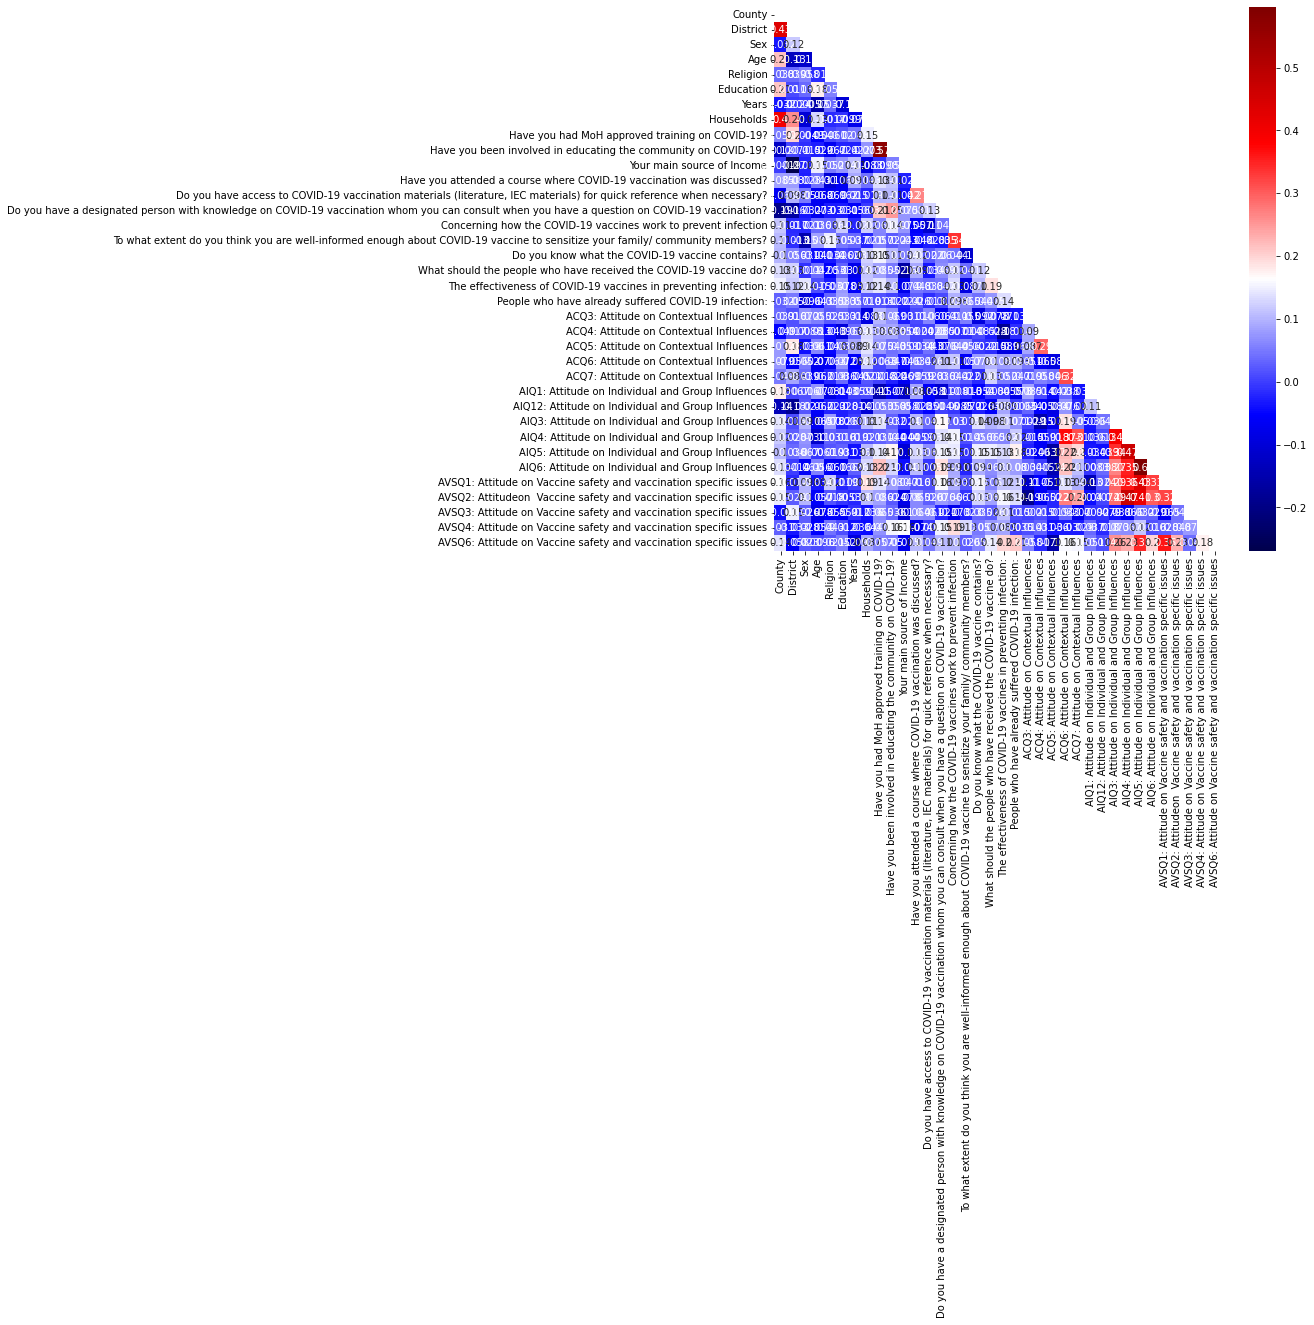

In [ ]:
# plot correlation
mask1 = np.triu(np.ones_like(data_corr, dtype=bool))
mask2 = np.tril(np.ones_like(data_corr, dtype=bool))
plt.figure(figsize=(10, 10))
sns.heatmap(data_corr, annot=True, cmap="seismic", mask=mask1)


In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


# remove columns that are highly correlated
corr_features = correlation(data_corr, 0.6)
print(len(corr_features))
print(corr_features)


# drop higly correlated columns
for i in corr_features:
    new_data.drop(i, axis=1, inplace=True)
    #encoded_dataset.drop(i,axis=1, inplace=True)


8
{'Households', 'Have you been involved in educating the community on COVID-19?', 'AVSQ2: Attitudeon  Vaccine safety and vaccination specific issues', 'AVSQ1: Attitude on Vaccine safety and vaccination specific issues', 'AIQ5: Attitude on Individual and Group Influences', 'AIQ6: Attitude on Individual and Group Influences', 'AIQ4: Attitude on Individual and Group Influences', 'AVSQ6: Attitude on Vaccine safety and vaccination specific issues'}


Train-Test Split

In [ ]:
# TRAIN TEST SPLIT

df = new_data

# https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html#where
df1 = df[df['County'] == 'Nairobi']
df2 = df[df['County'] == 'Mombasa']
df3 = df[df['County'] == 'Trans Nzoia']
df4 = df[df['County'] == 'Kajiado']

# take samples from each county for train set and leave rest for test
df1_train, df1_test = train_test_split(df1, train_size=0.6)
df2_train, df2_test = train_test_split(df2, train_size=0.6)
df3_train, df3_test = train_test_split(df3, train_size=0.6)
df4_train, df4_test = train_test_split(df4, train_size=0.6)

# joining splitted county datas to test and train sets
df_train = pd.concat([df1_train, df2_train, df3_train,
                     df4_train], ignore_index=True)
df_test = pd.concat([df1_test, df2_test, df3_test,
                    df4_test], ignore_index=True)
# print(df_train.columns.to_list())
print(df_train.shape)
print(df_test.shape)

# train labels
df_train_label = df_train.Label
df_train = df_train.drop('Label', axis=1)
print("columns used for training:", df_train.columns.to_list())

# test labels
df_test_label = df_test.Label
df_test = df_test.drop('Label', axis=1)

# encode for building model
for i in corr_features:
    # removing removed coorelated columns from encoder or it give error
    multi_encoder.columns.remove(i)

df_train_enc = multi_encoder.fit_transform(df_train)
df_test_enc = multi_encoder.fit_transform(df_test)

print(df_train_label.value_counts())
print(df_test_label.value_counts())


(246, 29)
(167, 29)
columns used for training: ['County', 'District', 'Sex', 'Age', 'Religion', 'Education', 'Years', 'Have you had MoH approved training on COVID-19?', 'Your main source of Income', 'Have you attended a course where COVID-19 vaccination was discussed?', 'Do you have access to COVID-19 vaccination materials (literature, IEC materials) for quick reference when necessary?', 'Do you have a designated person with knowledge on COVID-19 vaccination whom you can consult when you have a question on COVID-19 vaccination?', 'Concerning how the COVID-19 vaccines work to prevent infection', 'To what extent do you think you are well-informed enough about COVID-19 vaccine to sensitize your family/ community members?', 'Do you know what the COVID-19 vaccine contains?', 'What should the people who have received the COVID-19 vaccine do?', 'The effectiveness of COVID-19 vaccines in preventing infection:', 'People who have already suffered COVID-19 infection:', 'ACQ3: Attitude on Contextu

Building Model

In [ ]:
# build svm classifier model

svmc = svm.LinearSVC(max_iter=6000) #set max_iter to get rid of cannot converge error

svmc.fit(df_train_enc, df_train_label)

y_pred_svm = svmc.predict(df_train_enc)
y_testpred_svm = svmc.predict(df_test_enc)

print("Training Accuracy:", accuracy_score(df_train_label, y_pred_svm))
print("Test Accuracy:", accuracy_score(df_test_label, y_testpred_svm))


Training Accuracy: 0.8739837398373984
Test Accuracy: 0.8862275449101796


In [ ]:
# build logistic regression model

logistic_regression = LogisticRegression()

logistic_regression.fit(df_train_enc, df_train_label)

y_pred_lr = logistic_regression.predict(df_train_enc)
y_testpred_lr = logistic_regression.predict(df_test_enc)

print("Training Accuracy:", accuracy_score(df_train_label, y_pred_lr))
print("Test Accuracy:", accuracy_score(df_test_label, y_testpred_lr))


Training Accuracy: 0.8821138211382114
Test Accuracy: 0.8862275449101796


Training Accuracy: 0.8617886178861789
Test Accuracy: 0.8502994011976048
depth: 2 

Training Accuracy: 0.9146341463414634
Test Accuracy: 0.844311377245509
depth: 3 

Training Accuracy: 0.9227642276422764
Test Accuracy: 0.8502994011976048
depth: 4 

Training Accuracy: 0.9471544715447154
Test Accuracy: 0.8502994011976048
depth: 5 

Training Accuracy: 0.9715447154471545
Test Accuracy: 0.8023952095808383
depth: 6 

Training Accuracy: 0.9878048780487805
Test Accuracy: 0.8263473053892215
depth: 7 



Text(0, 0.5, 'Accuracy')

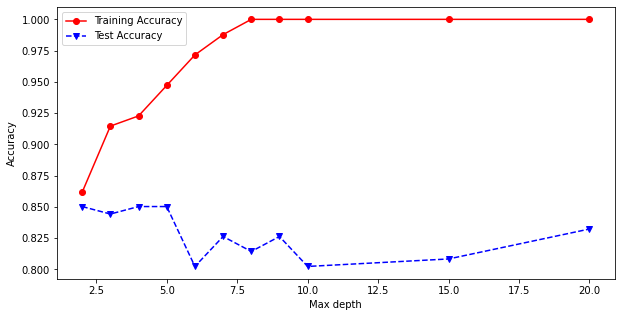

In [ ]:
# test different depths for decision tree

maxdepths = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for i in maxdepths:
    decision_tree_classifier = DecisionTreeClassifier(max_depth=i)

    decision_tree_classifier = decision_tree_classifier.fit(
        df_train_enc, df_train_label)

    y_pred2 = decision_tree_classifier.predict(df_train_enc)
    y_testpred2 = decision_tree_classifier.predict(df_test_enc)

    trainAcc[index] = accuracy_score(df_train_label, y_pred2)
    testAcc[index] = accuracy_score(df_test_label, y_testpred2)

    if accuracy_score(df_train_label, y_pred2) < 1:
        print("Training Accuracy:", accuracy_score(df_train_label, y_pred2))
        print("Test Accuracy:", accuracy_score(df_test_label, y_testpred2))
        print("depth:", i, "\n")

    index += 1

# plot accuracy at different depth
plt.figure(figsize=(10, 5))
plt.plot(maxdepths, trainAcc, 'ro-', maxdepths, testAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')


In [ ]:
# build decision tree model

decision_tree_classifier = DecisionTreeClassifier(max_depth=5)  # after max depth 4, it starts overfitting

decision_tree_classifier = decision_tree_classifier.fit(df_train_enc, df_train_label)

y_pred = decision_tree_classifier.predict(df_train_enc)
y_testpred = decision_tree_classifier.predict(df_test_enc)

print("Training Accuracy:", accuracy_score(df_train_label, y_pred))
print("Test Accuracy:", accuracy_score(df_test_label, y_testpred))


Training Accuracy: 0.9471544715447154
Test Accuracy: 0.8502994011976048


In [ ]:
# build random forest model

rf = RandomForestClassifier(max_depth=5)

rf.fit(df_train_enc, df_train_label)

y_pred_rf = rf.predict(df_train_enc)
y_testpred_rf = rf.predict(df_test_enc)

print("Training Accuracy:", accuracy_score(df_train_label, y_pred_rf))
print("Test Accuracy:", accuracy_score(df_test_label, y_testpred_rf))


Training Accuracy: 0.9349593495934959
Test Accuracy: 0.8862275449101796


In [ ]:
# xgboost

xgb_classifier = xgb.XGBClassifier(max_depth=5)

xgb_classifier.fit(df_train_enc, df_train_label)

y_pred_xgb = xgb_classifier.predict(df_train_enc)
y_testpred_xgb = xgb_classifier.predict(df_test_enc)

print("Training Accuracy:", accuracy_score(df_train_label, y_pred_xgb))
print("Test Accuracy:", accuracy_score(df_test_label, y_testpred_xgb))

Training Accuracy: 1.0
Test Accuracy: 0.8203592814371258


In [ ]:
# save best model for deployment
# best model from testing: XGBClassifier

file_name = "xgb_classifier.pkl"

# to save fitted model
pickle.dump(xgb_classifier, open(file_name, "wb"))

# to load model again
xgb_model_loaded : xgb.XGBClassifier = pickle.load(open(file_name, "rb"))


#test loaded model

y_pred_xgb_load = xgb_model_loaded.predict(df_train_enc)
y_testpred_xgb_load = xgb_model_loaded.predict(df_test_enc)

print("Training Accuracy:", accuracy_score(df_train_label, y_pred_xgb_load))
print("Test Accuracy:", accuracy_score(df_test_label, y_testpred_xgb_load))

Training Accuracy: 1.0
Test Accuracy: 0.8203592814371258
